In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('factbook.db')
tables = pd.read_sql_query('SELECT * FROM sqlite_master WHERE type="table";', conn)
print(pd.read_sql_query('SELECT * FROM facts LIMIT 5;', conn))

   id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46  


In [3]:
print(pd.read_sql_query('SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;', conn))

   MIN(population)  MAX(population)  MIN(population_growth)  \
0                0       7256490011                     0.0   

   MAX(population_growth)  
0                    4.02  


In [6]:
print(pd.read_sql_query('SELECT * FROM facts WHERE population=0 OR population=7256490011;', conn))

    id code        name  area  area_land area_water  population  \
0  250   ay  Antarctica  None   280000.0       None           0   
1  261   xx       World  None        NaN       None  7256490011   

   population_growth  birth_rate  death_rate migration_rate  
0                NaN         NaN         NaN           None  
1               1.08        18.6         7.8           None  


This is the markdown cell that describes the observation that "Antarctica" and "World" aren't actually countries.

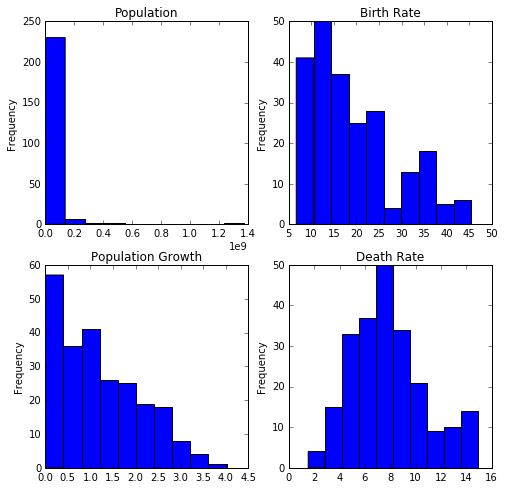

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

pop_data = pd.read_sql_query('SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE name != "Antarctica" AND name != "World";', conn)
fig, axes = plt.subplots(2, 2, figsize=(8,8))
pop_data['population'].plot.hist(ax=axes[0,0])
pop_data['population_growth'].plot.hist(ax=axes[1,0])
pop_data['birth_rate'].plot.hist(ax=axes[0,1])
pop_data['death_rate'].plot.hist(ax=axes[1,1])
axes[0,0].set_title('Population')
axes[1,0].set_title('Population Growth')
axes[0,1].set_title('Birth Rate')
axes[1,1].set_title('Death Rate')